Creating training data batches...
Creating validation data batches...
TF version: 2.1.0
TF Hub version: 0.8.0
GPU not available
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 7 steps, validate for 2 steps
Epoch 1/100
7/7 [==============================] - 52s 7s/step - loss: 0.3405 - accuracy: 0.8368 - val_loss: 0.0752 - val_accuracy: 0.9854
Epoch 2/100
7/7 [==============================] - 43s 6s/step - loss: 0.0403 - accuracy: 0.9915 - val_loss: 0.0182 - val_accuracy: 0.9951
Epoch 3/100
7/7 [==============================] - 53s 8s/step - loss: 0.0128 - accuracy: 0.9988 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 47s 7s/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 45s 6s/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/100
7/7 [===========================

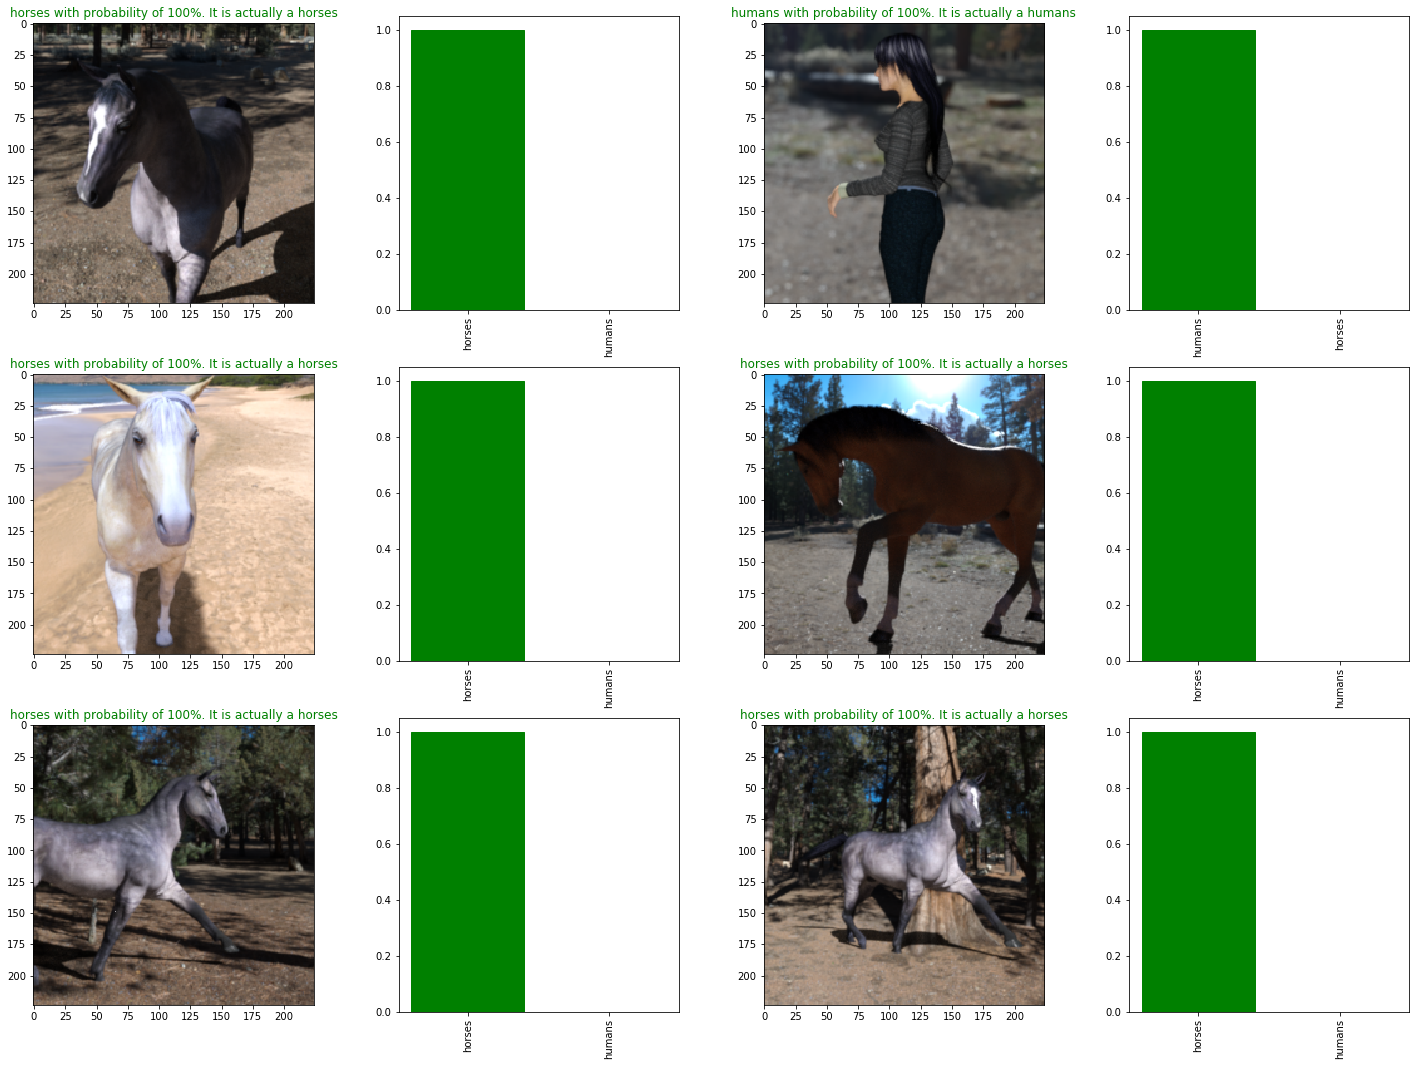

In [1]:
path = "D:/datasets/horse-or-human"

# start tensorboard with `tensorboard --logdir='{path}/logs' --port 2222`

from scripts.import_data import import_data
from scripts.preprocessing import preprocessing
from scripts.model import model
from scripts.predict import predict

i_d = import_data(path,2000)
i_d.import_raw_data()
i_d.get_raw_traindata()
X_train, X_val, y_train, y_val = i_d.X_train, i_d.X_val, i_d.y_train, i_d.y_val

p = preprocessing(i_d.unique_labels, BATCH_SIZE=128)
train_data = p.create_data_batches(X_train,y_train)
val_data = p.create_data_batches(X_val,y_val,valid_data=True)

m = model(i_d.unique_labels, path)
model = m.train_model(train_data, val_data)

pre = predict(model, val_data, i_d.unique_labels)
pre.check_predictions()